# AF6UY ditDahReader Library Usage

The AF6UY ditDahReader python3 library is a morse code (CW) library with its final goal of teach the author (AF6UY) morse code by playing IRC streams in morse code.  Along the way it will have other CW learning tools as well.

This file shows various use cases of ditDahReader.

In [1]:
import ditDahReader as dd
import numpy as np
import matplotlib.pyplot as plt

## Basic Tone generation

Plot the first few samples and last few samples of the tone, showing the raised cosine attack of the sine wave.  The raised cosine is to help keep clicking from happening.

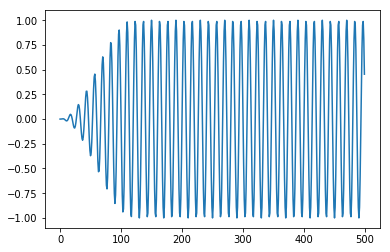

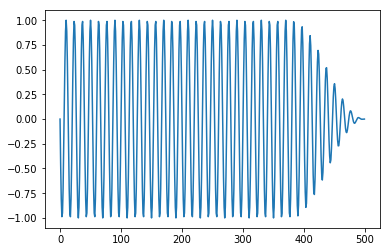

In [2]:
t = dd.Tone()
t.createTone(500) # ms
plt.plot(t.tone[:500])
plt.show()
plt.plot(t.tone[-500:])
plt.show()

## Raised cosine

A plot of the raised cosine looks like this.

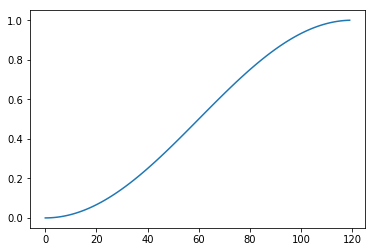

In [3]:
plt.plot(t.rc)
plt.show()

Check that the raised cosine is the correct number of milleseconds

In [4]:
np.isclose(len(t.rc) / t.fs, t.attack * dd.ms)

True

Play the tone.  Should be at the default 600 Hz, easy to hear for us old guys and should have no clicking sound.

In [5]:
t.play()

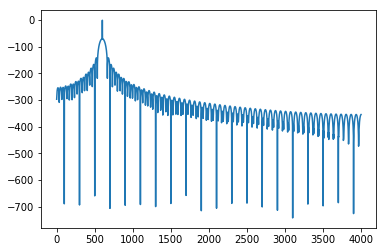

In [6]:
from scipy.fftpack import fft, fftshift

N = len(t.tone)
T = 1.0 / t.fs
yf = fftshift(fft(t.tone))
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

plt.plot(xf, 20*np.log(2.0/N*np.abs(yf[int(N/2):])))
plt.show()

# Morse class
Let's do some decoding of morse.  We use the standard '.' for dit and '-' for dah.  No human should actually read these characters.  I was considering using some off the wall characters so no one tried, but thought it would be a lot harder to debug.  The point is, we needed a way to understand more code with some easy characters, so why not use something readable.  We use ':' as the character break as you'll see in the example below.

In [7]:
m = dd.Morse()
m.translate("W1AW de AF6UY") == ".--:.----:.-:.-- -..:. .-:..-.:-....:..-:-.--"

True

In [8]:
m.play("AF6UY")

In [9]:
w = m.buildPlayList("AF6UY")

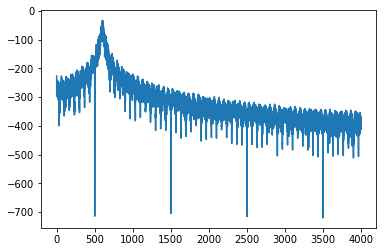

In [11]:
N = len(w)
T = 1.0 / t.fs
yf = fftshift(fft(w))
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

plt.plot(xf, 20*np.log(2.0/N*np.abs(yf[int(N/2):])))
plt.show()